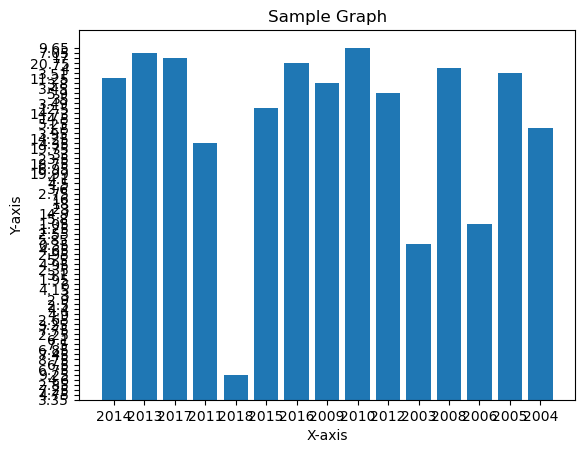

In [1]:
from tkinter import *
from tkinter import messagebox,filedialog,ttk
import csv
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

import pymysql as sql

def login_page():
    cl_window()
    global frame,user_label,user_name,pass_label,pass_word,name,pword,sign_in,sign_up,quit
    frame= LabelFrame(r,text='Login',padx=100,pady=50)
    frame.grid(row=1, column=0, padx=170, pady=200,sticky='news')
    user_label = Label(frame, text="User Name")
    user_label.grid(column=0, row=0)
    name = Entry(frame, textvariable=user_name,width=50)
    name.grid(column=1, row=0)
    pass_label = Label(frame, text="Password")
    pass_label.grid(column=0, row=2)
    pword = Entry(frame, textvariable=pass_word,show="*")
    if name.get()!='abc@gmail.com':
        name.insert(0,"abc@gmail.com")
        pword.insert(0,"********")
        pword.bind("<FocusIn>",lambda d:pword.delete('0','end')) if name.get()=='abc@gmail.com' else None
        name.bind("<FocusIn>",lambda d:name.delete('0','end')) if pword.get()=="********" else None
    
    pword.grid(column=1, row=2)
    j =Label(frame, text="  ").grid(column=0, row=1)
    k =Label(frame, text="  ").grid(column=0, row=3)
    sign_in = Button(frame, text='Sign In', width=10, height=2, command=signin)
    sign_in.grid(column=0, row=5, padx=10, pady=1,sticky= S)
    sign_up = Button(frame, text='Sign up', width=10, height=2,command=signup)
    sign_up.grid(column=1, row=5, padx=10, pady=1,sticky= S)
    quit =Button(r, text='Quit', width=10, height=1,command=r.destroy)
    quit.grid(column=1, row=0)
    
    
    
def signin():
    global user_name,pass_word,name,pword,good_name
    user_name,pass_word=name.get(),pword.get()
    b=''
    connect_db()
    if user_name != 'abc@gmail.com' and pass_word != "********" :
        if '@gmail.com' in user_name:
            db.execute("select * from %s where UserName = '%s'"%(table_name,user_name))
            a=db.fetchall()
            try:
                if user_name == a[0][2] and pass_word == a[0][3]:
                    good_name=a[0][1]
                    sucess= messagebox.showinfo(title='Login Sucessful', message="You are good to go!!")
                    if sucess =='ok':
                        open_auth_window()
                else:
                    b=messagebox.showwarning(title='Username Error', message='Kindly Check your User Name and Password')
            except:
                b=messagebox.showwarning(title='Username Error', message='User Name Does not exists !!')
        else:
            b=messagebox.showwarning(title='Username Error', message='User Name should be your mail id')  
    else:
        b=messagebox.showwarning(title='Error', message='Kindly Check your Credentials')
    if b=='ok':
        login_page()
    disconnect_db()
         
        
def cl_window():
    for widget in r.winfo_children():
        widget.destroy()
        
def top_bar():
        welcome_label = Label(r, text='Welcome, %s!' % (good_name.capitalize().split()[0]), font=("arial", 15, "bold", "underline"))
        welcome_label.grid(column=0, row=0, padx=10, pady=10, sticky="W")

        log_out_button = Button(r, text='Log Out', command=logout)
        log_out_button.grid(column=10, row=0, padx=10, pady=10) 
        
def open_auth_window():
    global user_name, pass_word,good_name,file_en
    cl_window()    
    top_bar()
    
    frame = LabelFrame(r, text='File', padx=10, pady=10, borderwidth=5)
    frame.grid(column=0, row=1, columnspan=10, padx=10, pady=10)
    file_en = Entry(frame, textvariable=directory, width=100)
    file_en.grid(column=0, row=1, padx=10, pady=10, columnspan=9, sticky="w")
    file_button = Button(frame, text='Select a File', command=file)
    file_button.grid(column=9, row=1)
    done_button =Button(frame, text='Confirm Selection',command=confirm)
    done_button.grid(column=9, row=2)
    
def file():
    global directory,file_en
    r.filename = filedialog.askopenfilename(title='Select a file', filetypes=(('csv', '*.csv'),))
    directory=r.filename
    if len(directory)>1:
        file_en.delete(0, 'end') 
        file_en.insert(0, directory)  

def confirm():
    global t_check,g_check
    top_bar()
    separator = ttk.Separator(r, orient='horizontal')
    separator.grid(row=2,columnspan=11, sticky='ew', pady=10)

    analysis_label = Label(r, text='You have selected %s file for Analysis !!' % (directory.split('/')[-1].replace('.csv','').capitalize()))
    analysis_label.grid(column=0, row=3, padx=10, pady=10, sticky="nswe")
    
    table_button = Button(r,text='Table View',command=create_table)
    table_button.grid(column=8, row=3, padx=10, pady=10, sticky="nswe")
    
    graph_button = Button(r,text='Graph View',command=graph_axis)
    graph_button.grid(column=9, row=3, padx=10, pady=10, sticky="nswe")
    g_check,t_check=0,0

def create_table():
    global directory,frame_table,headers,t_check,g_check
    if g_check == 1:
        g_frame.destroy()
    def populate_table(tree, csv_file):
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            headers = next(reader)

            tree["columns"] = headers
            for header in headers:
                tree.column(header, anchor='w', width=50)
                tree.heading(header, text=header, anchor='w')

            for row in reader:
                tree.insert("", END, values=row)

    frame_table = Frame(r)
    frame_table.grid(row=4, column=0,columnspan=10, padx=10, pady=10, sticky="nsew")

    tree = ttk.Treeview(frame_table,height=20,show='headings')
    populate_table(tree, directory)
    tree.grid(row=0, column=0, padx=10, pady=10, sticky="nsew")

    yscrollbar = Scrollbar(frame_table, orient="vertical", command=tree.yview)
    yscrollbar.grid(row=0, column=1, padx=10, pady=10, sticky="ns")
    xscrollbar = Scrollbar(frame_table, orient="horizontal", command=tree.xview)
    xscrollbar.grid(row=1, column=0, padx=10, pady=10, sticky="we")

    tree.configure(yscrollcommand=yscrollbar.set, xscrollcommand=xscrollbar.set)
    t_check=1

def plot_graph():
    global frame_table,directory,g_frame,t_check,g_check,head_dict,dropdownx,dropdowny
    
    xg=dropdownx.get()
    yg=dropdowny.get()
    g_frame.destroy()
    with open(directory, 'r') as file:
            content = csv.reader(file)
            headers = next(content)
            content=list(content)
    
    plot_frame=LabelFrame(r,text='Choose Axis', padx=10, pady=10)
    plot_frame.grid(row=5, column=0,columnspan=10, padx=10, pady=10, sticky="nsew")
    
    x = [a[head_dict[xg]] for a in content[0:100]]
    y = [a[head_dict[yg]] for a in content[0:100]]

    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Sample Graph')

    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().grid(row=4,column=0,padx=10,pady=10)


def graph_axis():
    global frame_table,directory,g_frame,t_check,g_check,head_dict,dropdownx,dropdowny
    
    if t_check==1:
        frame_table.destroy()
    with open(directory, 'r') as file:
            reader = csv.reader(file)
            headers = next(reader)
            head_indx=list(range(0,len(headers)))
            head_dict={}
            items=[]
            for x,y in zip(headers,head_indx):
                head_dict[x]=y
                items.append(x)
    g_frame= LabelFrame(r,text='Choose Axis', padx=10, pady=10)
    g_frame.grid(row=5, column=0,columnspan=10, padx=10, pady=10, sticky="nsew")
    xaxis= Label(g_frame,text='Choose A Dimension Field for X axis',padx=10, pady=10)
    xaxis.grid(row=0,column=0,padx=10,pady=10)
    dropdownx= ttk.Combobox(g_frame, values=items)
    dropdownx.grid(row=0, column=1, padx=10, pady=10)
    yaxis= Label(g_frame,text='Choose A Dimension Field for Y axis',padx=10, pady=10)
    yaxis.grid(row=1,column=0,padx=10,pady=10)
    dropdowny= ttk.Combobox(g_frame, values=items)
    dropdowny.grid(row=1, column=1, padx=10, pady=10)
    
    
    get_graph=Button(g_frame,text='Get Graph',command=plot_graph)
    get_graph.grid(row=2, column=1,rowspan=2, padx=10, pady=10)
    

                     
    
def logout():
    global user_name,pass_word
    qm = messagebox.askquestion(title='Log Out', message='Do you want to Log Out')
    if qm == 'yes':
        user_name=''
        pass_word=''
        login_page()
    
def signup():
    global  user_name,cnf_pass_word,sp_pass_word,sp_user_name,sp_name,cp_word,p_word,u_name,f_name

    cl_window()
    
    frame= LabelFrame(r,text='Sign up',padx=100,pady=50,borderwidth=5)
    frame.grid(row=1, column=0, padx=300, pady=50)
    
    back = Button(r, text='<< Go Back', width=10, height=1,command=login_page)
    back.grid(column=0, row=0, padx=10, pady=10,sticky='w')
    
    name_label =Label(frame, text="Name", font=("Times New Roman", 12, "bold"), fg="black")
    name_label.grid(column=0, row=1, padx=10, pady=10,sticky='e') 
    
    f_name = Entry(frame, textvariable=sp_name)
    f_name.grid(column=1, row=1, padx=10, pady=10)
    f_name.insert(0,'Your Name')
    f_name.bind("<FocusIn>",lambda d:f_name.delete('0','end'))
    
    user_label = Label(frame, text="User Name", font=("Times New Roman", 12, "bold"), fg="black")
    user_label.grid(column=0, row=2, padx=10, pady=10,sticky='e')
    
    u_name = Entry(frame, textvariable=sp_user_name)
    u_name.grid(column=1, row=2, padx=10, pady=10)
    u_name.insert(0,'abc@gmail.com')
    u_name.bind("<FocusIn>",lambda d:u_name.delete('0','end'))
    
    pass_label = Label(frame, text="Password", font=("Times New Roman", 12, "bold"), fg="black")
    pass_label.grid(column=0, row=3, padx=10, pady=10,sticky='e')
    
    p_word = Entry(frame, textvariable=sp_pass_word)
    p_word.grid(column=1, row=3, padx=10, pady=10)
    p_word.insert(0,'Create password')
    p_word.bind("<FocusIn>",lambda d:p_word.delete('0','end'))
    
    cp_label = Label(frame, text="Re-Enter Password", font=("Times New Roman", 12, "bold"), fg="black")
    cp_label.grid(column=0, row=4, padx=10, pady=10,sticky='e')
    
    cp_word = Entry(frame, textvariable=cnf_pass_word)
    cp_word.grid(column=1, row=4, padx=10, pady=1)
    cp_word.insert(0,'Confirm Password')
    cp_word.bind("<FocusIn>",lambda d:cp_word.delete('0','end'))
        
    done = Button(frame, text='Sign up', width=10, height=2,command=gettodb)
    done.grid(column=1, row=5, padx=10, pady=10)
    
def connect_db():
    global connection,db,table_name,db_name
    table_name = 'login_credentials'
    db_name = 'User_details'
    connection = sql.connect(host='localhost', user='root', port=3306, password='Giri@021103')
    db = connection.cursor()
    db.execute("create database if not exists %s" % (db_name))
    db.execute("use %s" % (db_name))
    db.execute("create table if not exists %s (update_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP, Name varchar(500), UserName varchar(500), PassWord varchar(20),constraint user_primary primary key(UserName))" % (table_name))
    connection.commit()
    
def disconnect_db():
    global connection,db,table_name,db_name
    connection.commit()
    db.close()
    connection.close()
    
def gettodb():
    global connection,db,table_name,db_name,user_name,cnf_pass_word,sp_pass_word,sp_user_name,sp_name,cp_word,p_word,u_name,f_name
    connect_db()
    
    cnf_pass_word=cp_word.get()
    sp_pass_word=p_word.get()
    sp_user_name= u_name.get()
    sp_name= f_name.get()
    b=''
    if sp_name != 'Your Name' and sp_user_name !='abc@gmail.com' and cnf_pass_word != '********':
        if cnf_pass_word == sp_pass_word:
            if '@gmail.com'in sp_user_name:
                if len(sp_name) >0:
                    try:
                        db.execute('insert into %s (Name,UserName,PassWord) values ("%s","%s","%s")'%(table_name,sp_name,sp_user_name,cnf_pass_word))
                        a = messagebox.showinfo(title='Sucess!!', message='Your Details Recorded Sucessfully !!')
                        if a =='ok':
                            login_page()
                    except:
                        b=messagebox.showwarning(title='Error', message='Username already exists!!')
                else:
                    b= messagebox.showwarning(title='Name Error', message='Name field cannot be empty')
            else:
                b=messagebox.showwarning(title='Username Error', message='Give valid username')
        else:
            b=messagebox.showwarning(title='Password Error', message="Re-enter Password and Password doesn't match")
    else:
        b=messagebox.showwarning(title='Error', message='Kindly Provide valid info')
    disconnect_db()   
    if b=='ok':
        cl_window()
        signup()
        
    
    

    
    
    
r = Tk()
r.title('Login Window')
r.geometry('850x950')
r.resizable(True,True)
#r.geometry("%sx%s"%(r.winfo_screenwidth(),r.winfo_screenheight()))
user_name = StringVar()
pass_word = StringVar()
cnf_pass_word= StringVar()
sp_pass_word= StringVar()
sp_user_name = StringVar()
sp_name= StringVar()
directory = StringVar()
login_page()

r.mainloop()

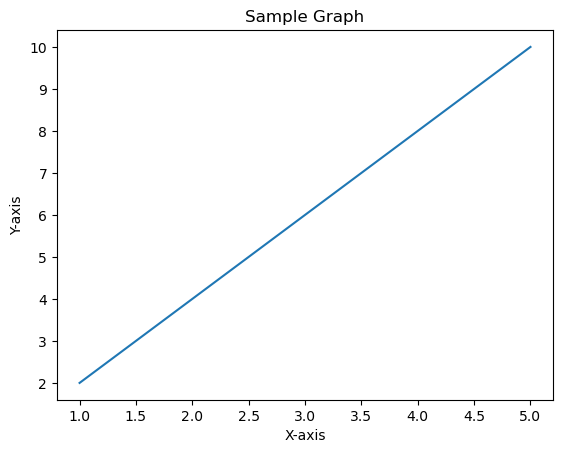

In [30]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

def plot_graph():
    x = [1, 2, 3, 4, 5]
    y = [2, 4, 6, 8, 10]

    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Sample Graph')

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

root = tk.Tk()
root.title('Tkinter Graph Example')

plot_button = tk.Button(root, text='Plot Graph', command=plot_graph)
plot_button.pack()

root.mainloop()


In [13]:
import csv
import matplotlib.pyplot as plt

xg='Team'
yg='Run Scored'

with open(r'C:\Users\mailt\Jupyter workspace\asiacup.csv', 'r') as file:
            content = csv.reader(file)
            
            headers = next(content)
            content=list(content)
print(content)
head_indx=list(range(0,len(headers)))
head_dict={}
items=[]
#print(headers,head_indx)

for x,y in zip(headers,head_indx):
    head_dict[x]=y
    items.append(x)
    

print(head_dict)

result={}
"""for a in content:
    if a[head_dict[xg]] not in result:
        result[a[head_dict[xg]]]=
"""        

#fig, ax = plt.subplots()
#ax.plot(x, y)
#ax.set_xlabel('X-axis')
#ax.set_ylabel('Y-axis')
#ax.set_title('Sample Graph')

    
plt.show()
print(x,y)

[['Pakistan', 'Sri Lanka', 'ODI', 'Sharjah', '1984', 'Lose', 'Batting', '187', '9', '9', '3', '21', '4.06', '52.04', '47', '5', '26', '2', 'Roy Dias', 'Lose'], ['Sri Lanka', 'Pakistan', 'ODI', 'Sharjah', '1984', 'Win', 'Bowling', '190', '5', '11', '1', '26', '4.36', '68.51', '57', '9', '21', '3', 'Roy Dias', 'Win'], ['India', 'Sri Lanka', 'ODI', 'Sharjah', '1984', 'Win', 'Bowling', '97', '0', '9', '0', '14', '4.47', '60.48', '51', '10', '8', '3', 'Surinder Khanna', 'Win'], ['Sri Lanka', 'India', 'ODI', 'Sharjah', '1984', 'Lose', 'Batting', '96', '10', '7', '0', '8', '2.34', '25.74', '38', '0', '14', '0', 'Surinder Khanna', 'Lose'], ['India', 'Pakistan', 'ODI', 'Sharjah', '1984', 'Win', 'Batting', '188', '4', '13', '3', '17', '4.08', '60.21', '56', '10', '5', '3', 'Surinder Khanna', 'Win'], ['Pakistan', 'India', 'ODI', 'Sharjah', '1984', 'Lose', 'Bowling', '134', '10', '5', '0', '5', '3.37', '39.46', '35', '4', '17', '1', 'Surinder Khanna', 'Lose'], ['Sri Lanka', 'Pakistan', 'ODI', 'Col

In [12]:
a = [['Pakistan', 'Sri Lanka', 'ODI', 'Sharjah', '1984', 'Lose', 'Batting', '187', '9', '9', '3', '21', '4.06', '52.04', '47', '5', '26', '2', 'Roy Dias', 'Lose'], ['Sri Lanka', 'Pakistan', 'ODI', 'Sharjah', '1984', 'Win', 'Bowling', '190', '5', '11', '1', '26', '4.36', '68.51', '57', '9', '21', '3', 'Roy Dias', 'Win']]
print(a[0][0])



Pakistan
